<a href="https://colab.research.google.com/github/devesssi/dl-playground/blob/main/pred_on_fercnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
class FER_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*12*12, 128),
            nn.ReLU(),
            nn.Linear(128, 7)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FER_CNN().to(device)

# Load your trained weights (.pth file)
model.load_state_dict(torch.load("fer_cnn.pth", map_location=device))
model.eval()


FER_CNN(
  (conv_layer): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=9216, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=7, bias=True)
  )
)

In [5]:
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [6]:
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])


In [7]:
def predict_image(image_path):
    img = Image.open(image_path)
    img_t = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img_t)
        pred = output.argmax(1).item()

    plt.imshow(img.convert("L"), cmap='gray')
    plt.title(f"Predicted: {classes[pred]}")
    plt.axis("off")
    plt.show()


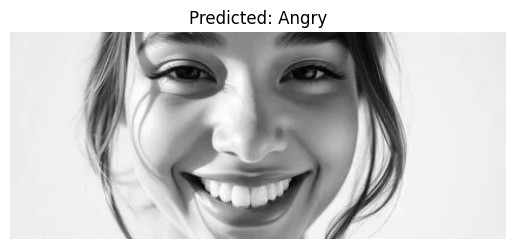

In [8]:
predict_image("image.webp")
